In [13]:
import pandas as pd
import numpy as np
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('./data/Salary.csv')

In [3]:
data.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [4]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
data.describe()

YearsExperience         Salary
count        35.000000      35.000000
mean          6.308571   83945.600000
std           3.618610   32162.673003
min           1.100000   37731.000000
25%           3.450000   57019.000000
50%           5.300000   81363.000000
75%           9.250000  113223.500000
max          13.500000  139465.000000

In [6]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 35     │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ YearsExperience    │   0 │     0 │    6.3 │    3.6 │    1.1 │    3.5 │    5.3 │     9.2 │      14 │ ▆▇▅▃▅▃ │  │
│ │ Salary             │   0 │     0 │  84000 │  32000 │  38000 │  57000 │  81000 │  110000 │  140000 │ ▅▇▁▃▅▃ │  │
│ └────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴─────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
data.isnull()

YearsExperience  Salary
0             False   False
1             False   False
2             False   False
3             False   False
4             False   False
5             False   False
6             False   False
7             False   False
8             False   False
9             False   False
10            False   False
11            False   False
12            False   False
13            False   False
14            False   False
15            False   False
16            False   False
17            False   False
18            False   False
19            False   False
20            False   False
21            False   False
22            False   False
23            False   False
24            False   False
25            False   False
26            False   False
27            False   False
28            False   False
29            False   False
30            False   False
31            False   False
32            False   False
33            False   False
34            False   False

In [8]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [9]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

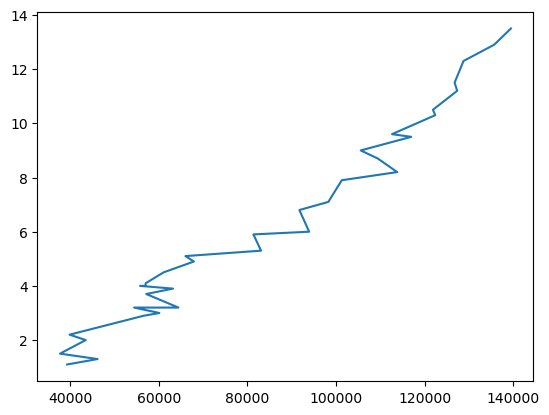

In [11]:
plt.plot(data['Salary'],data['YearsExperience'])

In [12]:
data

YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             12.9  135675
34             13.5  139465

In [14]:
x = data.drop('Salary',axis=1)

In [15]:
x

YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
30             11.2
31             11.5
32             12.3
33             12.9
34             13.5

In [16]:
y=data['Salary']

In [17]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)